In [1]:
from IPython.display import FileLink

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(reshape2)
library(phyloseq)
library(ggplot2)
library(plyr); library(dplyr)
library(RColorBrewer)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [4]:
%%R
workDir = '/home/chantal/Chazy/Bulk/515_806/data/'
figDir = '/home/chantal/Chazy/Bulk/515_806/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/'
physeqBulk = 'bulk-core-rare'

nprocs = 20

In [5]:
%%R

F = file.path(physeqDir, physeqBulk)

physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = prune_samples((physeq.Bulk.m$Land_Management != "PAS"),
                           physeq.Bulk)
physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE) 
    
physeq.Bulk = physeq.Bulk %>% transform_sample_counts(function(x) x/sum(x))

physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.Sparsity

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3964 taxa and 175 samples ]
sample_data() Sample Data:       [ 175 samples by 25 sample variables ]
tax_table()   Taxonomy Table:    [ 3964 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3964 tips and 3963 internal nodes ]


In [6]:
%%R
mdf = psmelt(physeq.Bulk.Sparsity)
head(mdf)

          OTU         Sample  Abundance    Full.sample Fraction PrimerF PrimerR
53197  OTU.12        N.NTH.4 0.04780000        N.NTH.4       NA    515f    806r
53041  OTU.12        O.NTH.3 0.04260000        O.NTH.3       NA    515f    806r
53116  OTU.12        N.NTH.2 0.04226667        N.NTH.2       NA    515f    806r
7710  OTU.103   July15.PTH.2 0.04126667   July15.PTH.2       NA    515f    806r
53179  OTU.12 Oct.NTH.3.2015 0.04040000 Oct.NTH.3.2015       NA    515f    806r
53077  OTU.12        N.NTH.1 0.03706667        N.NTH.1       NA    515f    806r
      Barcode Rev.index Fwd.index Treatment Day Replicate Pool Land_Management
53197     177  gtctatga  ctactata      <NA>  NA         4    5             NTH
53041     158  cgagcgac  tcgacgag      <NA>  NA         3    5             NTH
53116     175  gtctgcta  gatcgtgt      <NA>  NA         2    5             NTH
7710      101  cgagagtt  acgtctcg      <NA>  NA         2    4             PTH
53179      54  tagtctcc  cgtgagtg      <NA>  

In [7]:
%%R
mdf$Rank2 = gsub("__", "", mdf$Rank2)
mdf$Rank3 = gsub("__", "", mdf$Rank3)
mdf$Rank4 = gsub("__", "", mdf$Rank4)
mdf$Rank5 = gsub("__", "", mdf$Rank5)
mdf$Rank6 = gsub("__", "", mdf$Rank6)
mdf$Rank7 = gsub('__', "", mdf$Rank7)

In [8]:
%%R 
phyl.rem = mdf %>% group_by(Rank2) %>% summarise(sum = sum(Abundance)) %>% arrange(-sum) %>% filter(sum < 0.08)

In [9]:
%%R
CV.OTU = mdf %>% filter(!(Rank2 %in% phyl.rem$Rank2)) %>% group_by(OTU) %>% 
    summarise(mean = mean(Abundance), sd = sd(Abundance), cv = (sd/mean))

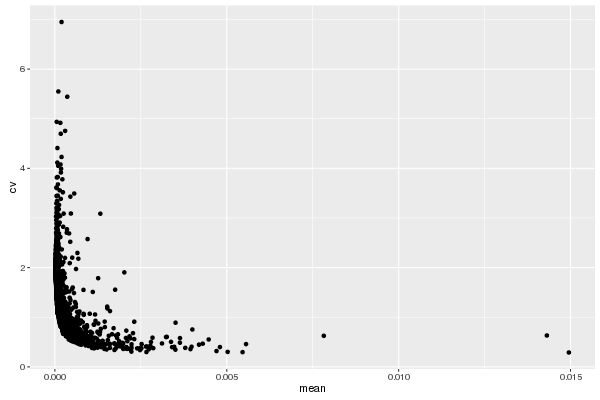

In [10]:
%%R -w 600 -h 400
ggplot() + geom_point(data= CV.OTU, aes(x = mean, y = cv)) 

In [11]:
%%R
CV = mdf %>% filter(!(Rank2 %in% phyl.rem$Rank2)) %>% 
    group_by(OTU, Rank2, Rank3, Rank4, Rank5, Rank6,Rank7, Land_Management) %>% 
    summarise(mean = mean(Abundance), sd = sd(Abundance), cv = (sd/mean))

In [12]:
%%R
head(CV)

Source: local data frame [6 x 11]
Groups: OTU, Rank2, Rank3, Rank4, Rank5, Rank6, Rank7 [2]

     OTU          Rank2         Rank3            Rank4             Rank5
   (chr)          (chr)         (chr)            (chr)             (chr)
1  OTU.1 Actinobacteria Micrococcales   Micrococcaceae      Arthrobacter
2  OTU.1 Actinobacteria Micrococcales   Micrococcaceae      Arthrobacter
3  OTU.1 Actinobacteria Micrococcales   Micrococcaceae      Arthrobacter
4  OTU.1 Actinobacteria Micrococcales   Micrococcaceae      Arthrobacter
5 OTU.10  Bacteroidetes Flavobacteria Flavobacteriales Flavobacteriaceae
6 OTU.10  Bacteroidetes Flavobacteria Flavobacteriales Flavobacteriaceae
Variables not shown: Rank6 (chr), Rank7 (chr), Land_Management (fctr), mean
  (dbl), sd (dbl), cv (dbl)


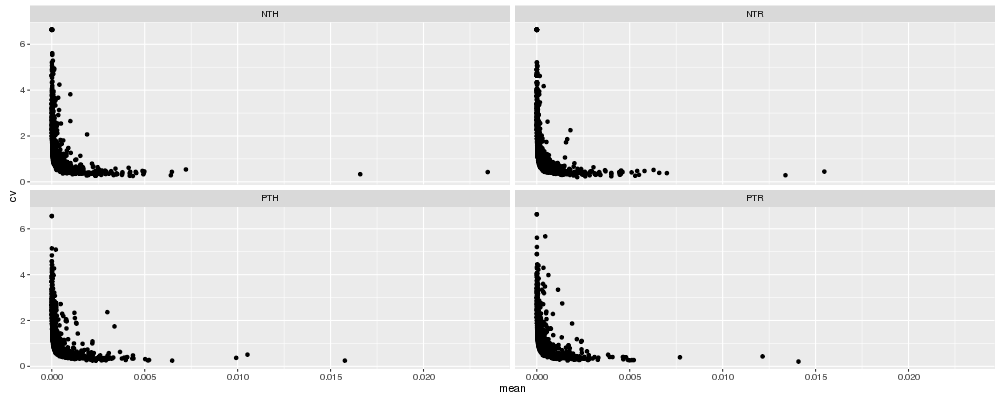

In [13]:
%%R -w 1000 -h 400
ggplot() + geom_point(data= CV, aes(x = mean, y = cv)) + facet_wrap(~Land_Management)

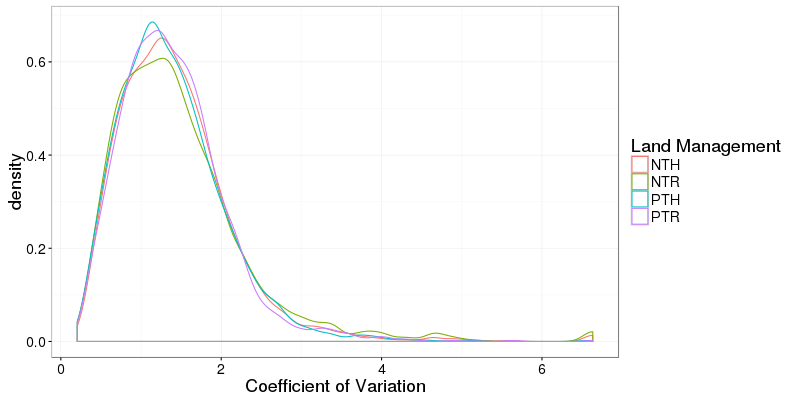

In [47]:
%%R -w 800 -h 400
p = ggplot() + geom_density(data = CV, aes(cv, color = Land_Management)) +theme_bw() + theme(text = element_text(size=18))+
xlab('Coefficient of Variation') + scale_color_discrete(name = 'Land Management')

p

In [48]:
%%R
ggsave('data/figs/CV.jpg', p, width=8, height=4)


In [14]:
%%R
CV %>% na.omit %>% group_by(Land_Management) %>% summarise(meanCV = mean(cv), sdcv = sd(cv))

Source: local data frame [4 x 3]

  Land_Management   meanCV      sdcv
           (fctr)    (dbl)     (dbl)
1             NTH 1.480704 0.6669554
2             NTR 1.530154 0.8170883
3             PTH 1.465267 0.6488449
4             PTR 1.458709 0.6321644


In [15]:
%%R
head(CV$Land_Management)

[1] NTH NTR PTH PTR NTH NTR
Levels: NTH NTR PTH PTR


In [16]:
%%R
kt.test = kruskal.test(CV$cv ~ CV$Land_Management)
(kt.test)


	Kruskal-Wallis rank sum test

data:  CV$cv by CV$Land_Management
Kruskal-Wallis chi-squared = 6.5005, df = 3, p-value = 0.08964



In [17]:
%%R
NTH = filter(CV, Land_Management == 'NTH')
PTH = filter(CV, Land_Management == 'PTH')
NTR = filter(CV, Land_Management == 'NTR')
PTR = filter(CV, Land_Management == 'PTR')

var.test(PTR$cv, PTH$cv)                  


	F test to compare two variances

data:  PTR$cv and PTH$cv
F = 0.97939, num df = 3933, denom df = 3935, p-value = 0.5137
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9200465 1.0425624
sample estimates:
ratio of variances 
         0.9793904 



In [19]:
%%R
library(e1071)                    
CV %>% na.omit %>% group_by(Land_Management) %>% summarise(skewness = skewness(cv))

Source: local data frame [4 x 2]

  Land_Management skewness
           (fctr)    (dbl)
1             NTH 1.769703
2             NTR 2.249341
3             PTH 1.386684
4             PTR 1.626697


In [20]:
%%R
test = CV %>% filter(cv > 3.5)
head(test)

Source: local data frame [6 x 11]
Groups: OTU, Rank2, Rank3, Rank4, Rank5, Rank6, Rank7 [5]

        OTU            Rank2               Rank3                Rank4
      (chr)            (chr)               (chr)                (chr)
1  OTU.1024 Gemmatimonadetes    Gemmatimonadales    Gemmatimonadaceae
2  OTU.1028      Chloroflexi        Anaerolineae       Anaerolineales
3  OTU.1069    Acidobacteria               DA023 uncultured_bacterium
4 OTU.10809   Planctomycetes    Planctomycetacia     Planctomycetales
5 OTU.10809   Planctomycetes    Planctomycetacia     Planctomycetales
6 OTU.10915   Proteobacteria Alphaproteobacteria      Caulobacterales
Variables not shown: Rank5 (chr), Rank6 (chr), Rank7 (chr), Land_Management
  (fctr), mean (dbl), sd (dbl), cv (dbl)


In [21]:
%%R
seas.resp = read.csv('data/SpringSumFall_Resp.csv')

In [22]:
%%R
seas.resp = filter(seas.resp, !(is.na(Resp_status))) %>% select(OTU, Land_Management, Resp_status)
head(seas.resp)

        OTU Land_Management      Resp_status
1 OTU.15140             NTH Spring Responder
2   OTU.258             NTH Summer Responder
3    OTU.25             NTH   Fall Responder
4    OTU.74             NTR Summer Responder
5   OTU.338             NTR Summer Responder
6  OTU.6147             NTR Spring Responder


In [23]:
%%R
joint_resp = left_join(seas.resp, CV)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Joining by: c("OTU", "Land_Management")

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [24]:
%%R
filter(joint_resp, !(is.na(cv))) %>% group_by(Land_Management) %>% summarise(meanCV = mean(cv), sd = sd(cv))

Source: local data frame [4 x 3]

  Land_Management   meanCV        sd
           (fctr)    (dbl)     (dbl)
1             NTH 1.550948 0.5775200
2             NTR 1.707281 0.8219459
3             PTH 1.694951 0.5446646
4             PTR 1.882466 0.7535576


In [25]:
%%R
filter(joint_resp, !(is.na(cv))) %>% group_by(Land_Management, Resp_status) %>% 
        summarise(n = n(), meanCV = mean(cv), sd = sd(cv)) %>%
        ungroup() %>% arrange(-meanCV)

Source: local data frame [12 x 5]

   Land_Management      Resp_status     n    meanCV         sd
            (fctr)           (fctr) (int)     (dbl)      (dbl)
1              NTR   Fall Responder     5 2.2063739 0.39809542
2              NTH Spring Responder     1 2.0873278         NA
3              PTR Summer Responder    18 2.0029176 0.77777924
4              PTH Summer Responder    25 1.8007458 0.44671707
5              PTH Spring Responder     4 1.6577223 0.48595210
6              NTH Summer Responder     1 1.6259087         NA
7              NTR Spring Responder    19 1.6248990 0.85703410
8              PTR Spring Responder     4 1.5728459 0.48298236
9              NTR Summer Responder     2 1.2421723 1.10804018
10             PTR   Fall Responder     1 0.9528092         NA
11             NTH   Fall Responder     1 0.9396083         NA
12             PTH   Fall Responder     2 0.4469729 0.04163872


In [26]:
%%R
filter(joint_resp, !(is.na(cv))) %>% group_by(Resp_status) %>% summarise(n = n(), meanCV = mean(cv), sd = sd(cv))

Source: local data frame [3 x 4]

       Resp_status     n   meanCV        sd
            (fctr) (int)    (dbl)     (dbl)
1   Fall Responder     9 1.535359 0.8624392
2 Spring Responder    28 1.638667 0.7416967
3 Summer Responder    46 1.851770 0.6248845


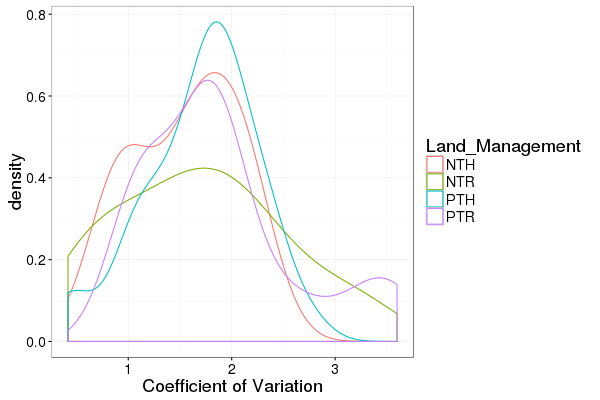

In [27]:
%%R -w 600 -h 400
ggplot() + geom_density(data = joint_resp, aes(cv, color = Land_Management)) +theme_bw() + theme(text = element_text(size=18))+
xlab('Coefficient of Variation') + scale_fill_discrete(name = 'Land Management')


#subset CV and test area under higher CV
#describing distribution...
#Calculate skew

In [28]:
%%R
CV %>% filter(cv > 3.5) %>% group_by(Land_Management) %>% summarise(count = n()) %>% ungroup %>% arrange(-count) %>% 
    as.data.frame

  Land_Management count
1             NTR   110
2             NTH    65
3             PTR    42
4             PTH    40


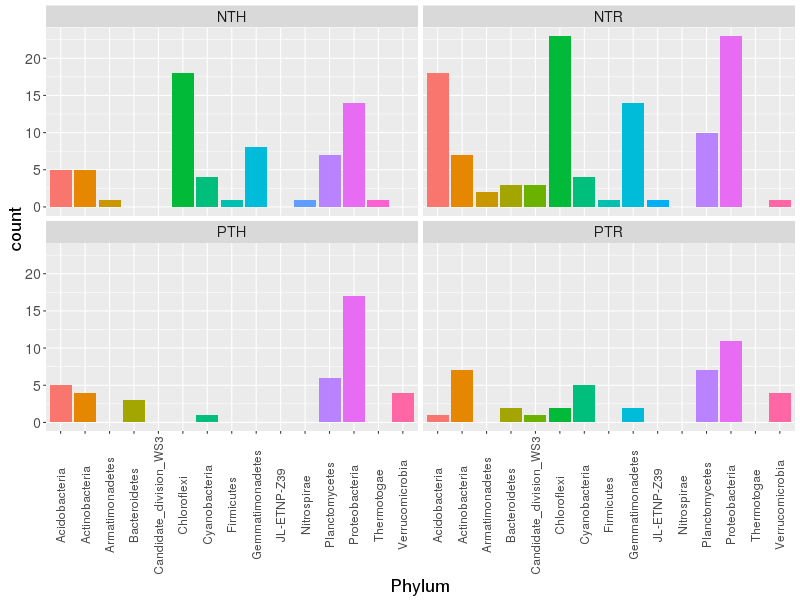

In [57]:
%%R -w 800 -h 600
bar = CV %>% filter(cv > 3.5) %>% group_by(Rank2, Rank5, Land_Management) %>% summarise(count = n()) %>% ungroup %>% arrange(-count) %>% 
    as.data.frame 

ggplot(bar, aes(Rank2, count)) + geom_bar(stat = 'identity', aes(fill = Rank2)) + facet_wrap (~Land_Management) +
    theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=12),text = element_text(size=18)) + guides(fill = FALSE)+
     scale_x_discrete(name="Phylum")

In [58]:
%%R
ggsave('data/figs/CVgreater3.5_phyl.jpg', width = 8, height = 6)

In [30]:
%%R
CV %>% filter(cv > 3.5) %>% group_by(Rank2) %>% summarise(count = n()) %>% ungroup %>% arrange(-count) %>% 
    as.data.frame

                    Rank2 count
1          Proteobacteria    65
2             Chloroflexi    43
3          Planctomycetes    30
4           Acidobacteria    29
5        Gemmatimonadetes    24
6          Actinobacteria    23
7           Cyanobacteria    14
8         Verrucomicrobia     9
9           Bacteroidetes     8
10 Candidate_division_WS3     4
11        Armatimonadetes     3
12             Firmicutes     2
13            JL-ETNP-Z39     1
14            Nitrospirae     1
15            Thermotogae     1


In [31]:
%%R
CV %>% filter(cv > 3.5) %>% group_by(Rank2, Rank5) %>% summarise(count = n()) %>% ungroup %>% arrange(-count) %>% 
    as.data.frame

                    Rank2                            Rank5 count
1           Acidobacteria                             <NA>    19
2          Planctomycetes                Planctomycetaceae    17
3        Gemmatimonadetes                       uncultured    15
4             Chloroflexi                  Anaerolineaceae    13
5          Planctomycetes                             <NA>     9
6           Acidobacteria             uncultured_bacterium     7
7           Cyanobacteria                             <NA>     7
8          Proteobacteria                   Comamonadaceae     7
9             Chloroflexi                   Caldilineaceae     6
10            Chloroflexi                      Roseiflexus     6
11       Gemmatimonadetes                             <NA>     6
12         Proteobacteria                     Sorangiineae     6
13         Proteobacteria             uncultured_bacterium     6
14         Proteobacteria                             <NA>     6
15         Actinobacteria

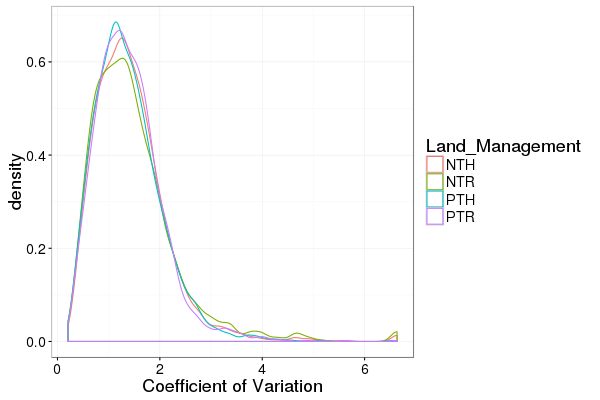

In [32]:
%%R -w 600 -h 400
ggplot() + geom_density(data = CV, aes(cv, color = Land_Management)) +theme_bw() + theme(text = element_text(size=18))+
xlab('Coefficient of Variation') + scale_fill_discrete(name = 'Land Management')


#subset CV and test area under higher CV
#describing distribution...
#Calculate skew

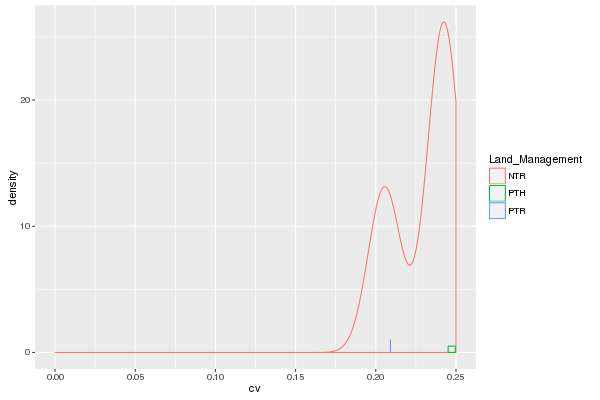

In [33]:
%%R -w 600 -h 400
ggplot() + geom_density(data = CV, aes(cv, color = Land_Management)) + xlim(0,0.25)

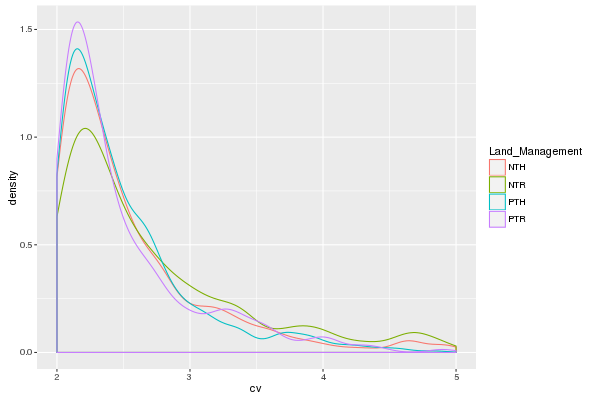

In [34]:
%%R -w 600 -h 400
ggplot() + geom_density(data = CV, aes(cv, color = Land_Management)) + xlim(2,5)

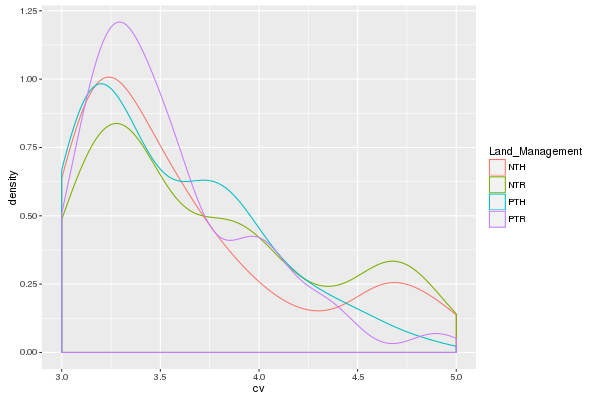

In [35]:
%%R -w 600 -h 400
ggplot() + geom_density(data = CV, aes(cv, color = Land_Management)) + xlim(3,5)

In [36]:
%%R
CV.phyl = mdf %>%  filter(!(Rank2 %in% phyl.rem$Rank2)) %>% group_by(OTU, Rank2) %>% 
    summarise(mean = mean(Abundance), sd = sd(Abundance), cv = (sd/mean))

In [37]:
%%R
head(CV.phyl)

Source: local data frame [6 x 5]
Groups: OTU [6]

        OTU          Rank2         mean           sd        cv
      (chr)          (chr)        (dbl)        (dbl)     (dbl)
1     OTU.1 Actinobacteria 7.823238e-03 4.898718e-03 0.6261753
2    OTU.10  Bacteroidetes 1.258667e-03 2.249544e-03 1.7872433
3   OTU.100 Actinobacteria 1.389333e-03 7.295885e-04 0.5251357
4  OTU.1000 Proteobacteria 1.535238e-04 1.417775e-04 0.9234886
5 OTU.10001 Proteobacteria 4.419048e-05 7.377931e-05 1.6695749
6  OTU.1001    Chloroflexi 1.013333e-04 1.290183e-04 1.2732069


In [38]:
%%R
CV.phyl %>% na.omit %>% group_by(Rank2) %>% summarise(meanCV = mean(cv), sdcv = sd(cv))

Source: local data frame [16 x 3]

                    Rank2   meanCV      sdcv
                    (chr)    (dbl)     (dbl)
1           Acidobacteria 1.283579 0.5236424
2          Actinobacteria 1.289586 0.5292769
3         Armatimonadetes 1.539822 0.3579515
4           Bacteroidetes 1.708050 0.6068360
5  Candidate_division_WS3 1.422431 0.5327529
6                Chlorobi 1.769939 0.2828766
7             Chloroflexi 1.425298 0.5210611
8           Cyanobacteria 2.591891 0.9537540
9              Firmicutes 1.524294 0.5669535
10       Gemmatimonadetes 1.504282 0.5176566
11            JL-ETNP-Z39 1.294924 0.3409989
12            Nitrospirae 1.111722 0.5110417
13         Planctomycetes 1.529765 0.4371281
14         Proteobacteria 1.426302 0.5943322
15            Thermotogae 1.344626 0.5872459
16        Verrucomicrobia 1.492038 0.4209629


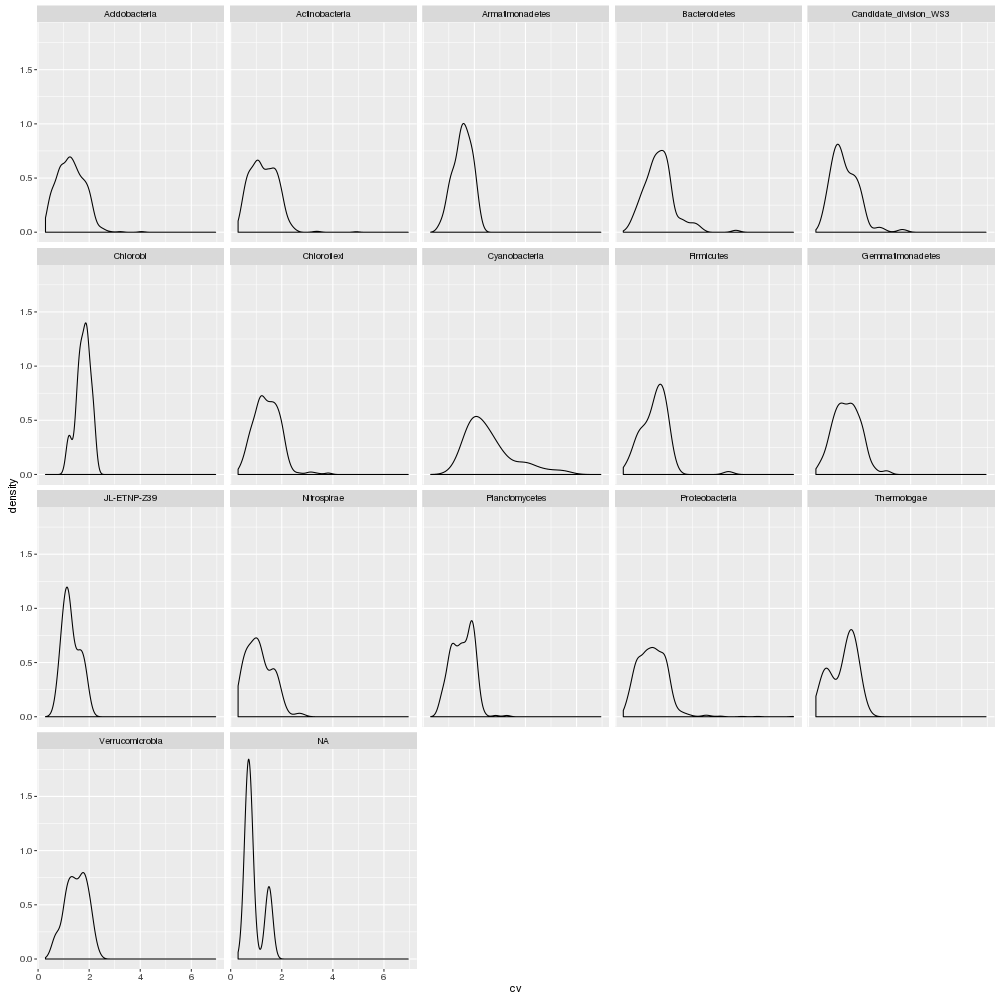

In [39]:
%%R -w 1000 -h 1000
ggplot() + geom_density(data = CV.phyl, aes(cv)) + facet_wrap(~Rank2)

##Diffs in averages and skew

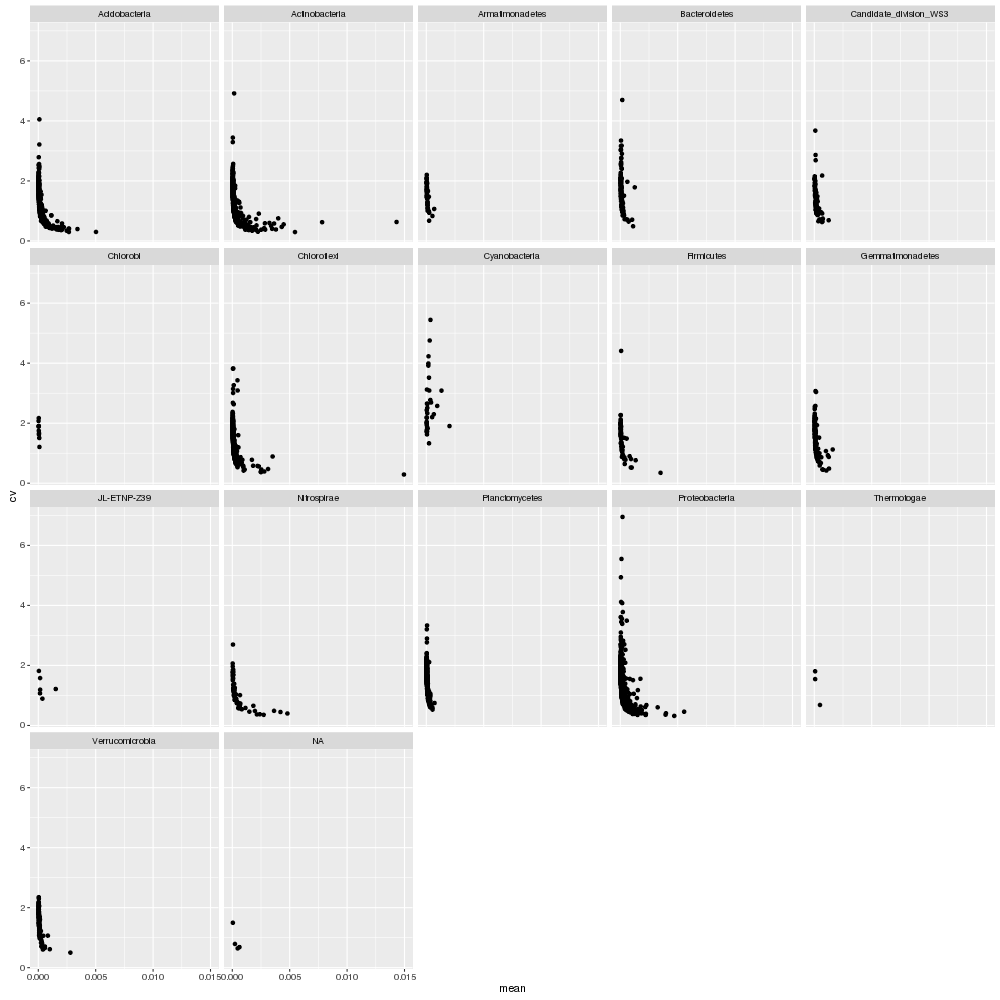

In [40]:
%%R -w 1000 -h 1000
ggplot() + geom_point(data= CV.phyl, aes(x = mean, y = cv)) + facet_wrap(~Rank2)

In [77]:
%%R
CV.both = mdf %>% group_by(OTU, Rank2, Land_Management) %>% 
    summarise(mean = mean(Abundance), sd = sd(Abundance), cv = (sd/mean))

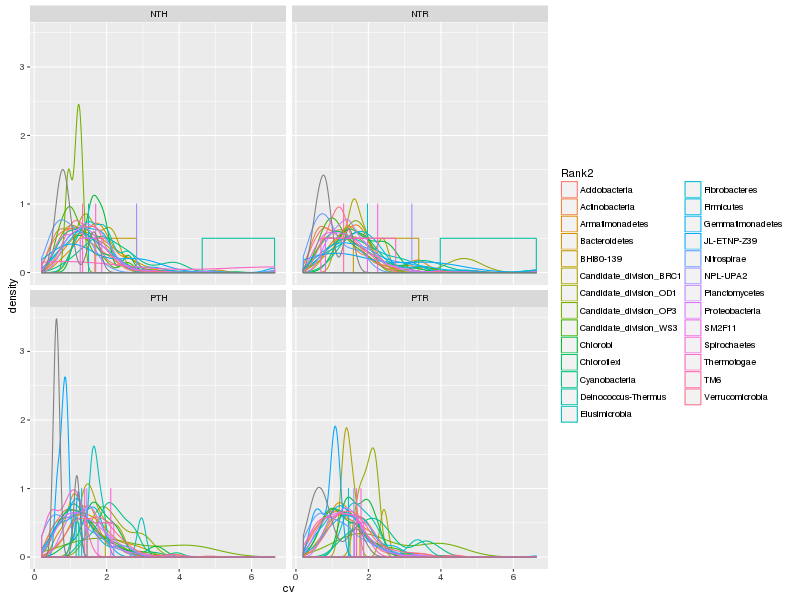

In [78]:
%%R -w 800 -h 600
ggplot() + geom_density(data = CV.both, aes(cv, color = Rank2)) + facet_wrap(~Land_Management)

In [23]:
%%R
unique(mdf$Sample_Date)

 [1] 11/26/14 10/29/14 7/16/15  10/27/15 6/17/15  11/25/15 9/24/14  7/10/14 
 [9] 9/23/15  4/30/15  8/13/15 
11 Levels: 10/27/15 10/29/14 11/25/15 11/26/14 4/30/15 6/17/15 ... 9/24/14


In [24]:
%%R
df.l2fc = read.csv("data/Month_Comparisons_byTreat.csv")

## Arrange by Nov 2014 Rank

In [25]:
%%R
mdf.byday = ddply(mdf, .(Sample_Date, OTU), summarize, mean_day_abundance = mean(Abundance))
mdf.byday = mdf.byday[order( mdf.byday$Sample_Date, -mdf.byday$mean_day_abundance),]
mdf.Nov = subset(mdf.byday, Sample_Date == '11/26/14')
mdf.Nov$Rank = rank(-mdf.Nov$mean_day_abundance, ties.method = "random")
mdf.byday.Nov = join(mdf.byday, mdf.Nov[,c("OTU","Rank")], by = "OTU")

In [26]:
%%R
head(df.l2fc)

  X Land_Management      OTU LFC_AugNov p_AugNov Month_AugNov          Rank2
1 1             NTH OTU.4940 -0.5733776        1     November  Acidobacteria
2 2             NTH OTU.5493  0.2285200        1       August    Chloroflexi
3 3             NTH OTU.1739 -0.4385353        1     November Planctomycetes
4 4             NTH OTU.1813  0.4330987        1       August Planctomycetes
5 5             NTH  OTU.778 -0.0417744        1     November Planctomycetes
6 6             NTH OTU.5511 -0.5325709        1     November Planctomycetes
  Rank5  LFC_AugAp   p_AugAp Month_AugAp   LFC_ApNov p_ApNov Month_ApNov
1  <NA> -0.6085073 0.9999941       April -0.06290669       1       April
2  <NA>         NA        NA        <NA>          NA      NA        <NA>
3  <NA>  0.9471104 0.9999941      August  1.50358325       1    November
4  <NA>  1.5159033 0.9999941      August  1.16653253       1    November
5  <NA>  0.3206218 0.9999941      August  0.38007821       1    November
6  <NA>         NA     

In [27]:
%%R
FDR = 0.10
df.l2fc.rspndr = df.l2fc %>%
    filter(Land_Management == 'NTR') %>%
    filter(p_AugNov <= 0.10 | p_AugAp <= 0.10) %>% 
    filter(Month_AugNov == 'November'| Month_AugAp == 'April')
  

In [28]:
%%R
d = left_join(df.l2fc.rspndr, mdf.byday.Nov) 

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Joining by: "OTU"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [29]:
%%R
head(d)

     X Land_Management       OTU LFC_AugNov p_AugNov Month_AugNov         Rank2
1 7219             NTR  OTU.6147  -1.677001        1     November Bacteroidetes
2 7222             NTR OTU.19153  -1.724302        1     November Bacteroidetes
3 7222             NTR OTU.19153  -1.724302        1     November Bacteroidetes
4 7222             NTR OTU.19153  -1.724302        1     November Bacteroidetes
5 7222             NTR OTU.19153  -1.724302        1     November Bacteroidetes
6 7222             NTR OTU.19153  -1.724302        1     November Bacteroidetes
                Rank5 LFC_AugAp    p_AugAp Month_AugAp LFC_ApNov   p_ApNov
1       Cytophagaceae -4.590615 0.01279937       April -3.202249 0.1416304
2 Sphingobacteriaceae -4.303370 0.01279937       April -2.598318 1.0000000
3 Sphingobacteriaceae -4.303370 0.01279937       April -2.598318 1.0000000
4 Sphingobacteriaceae -4.303370 0.01279937       April -2.598318 1.0000000
5 Sphingobacteriaceae -4.303370 0.01279937       April -2.598318 

In [14]:
%%R
#mdf.byday.ranked = filter(mdf.byday.ranked, Sample_Date == '7/10/14' )

NULL


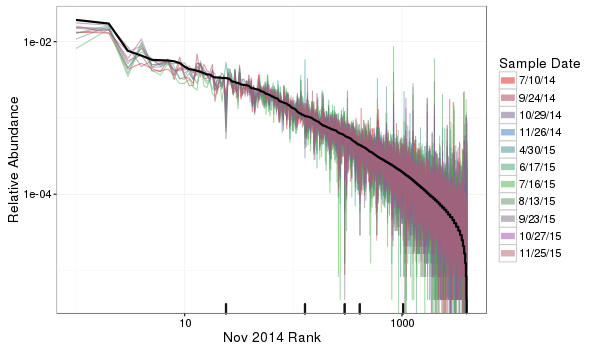

In [30]:
%%R -w 600 -h 350
getPalette = colorRampPalette(brewer.pal(5, "Set1"))

mdf.byday.Nov$Sample_Date = factor(mdf.byday.Nov$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

p = ggplot(mdf.byday.Nov, aes(x = Rank, y = mean_day_abundance)) 

#p = p + geom_vline(data = d.RNA, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.DNA, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = p + geom_line(alpha = 0.5, size = 0.5, aes(color = Sample_Date)) 

p = p + geom_rug(data = subset(d, p_AugNov <=0.10), sides = "b", size = 1, alpha = 0.2, color = 'black')
#p = p + geom_rug(data = d.DNA, color = "blue", sides = "t", size = 1.25)

p = p + geom_line(data = subset(mdf.byday.Nov, Sample_Date == '11/26/14'), size = 1)

p = p + scale_color_manual(values=getPalette(13))

p = p + scale_y_log10()

p = p + scale_x_log10()

p = p + theme_bw() + theme(text = element_text(size=14))

p = p + labs(x = "Nov 2014 Rank", y = "Relative Abundance", color = "Sample Date") +
       guides(colour = guide_legend(override.aes = list(size=3)))


p


## By April Rank

In [31]:
%%R
mdf.byday = ddply(mdf, .(Sample_Date, OTU), summarize, mean_day_abundance = mean(Abundance))
mdf.byday = mdf.byday[order( mdf.byday$Sample_Date, -mdf.byday$mean_day_abundance),]
mdf.1 = subset(mdf.byday, Sample_Date == '4/30/15')
mdf.1$Rank = rank(-mdf.1$mean_day_abundance, ties.method = "random")
mdf.byday.ranked = join(mdf.byday, mdf.1[,c("OTU","Rank")], by = "OTU")

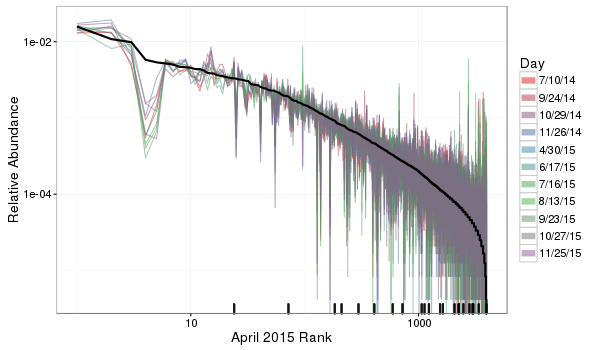

In [32]:
%%R -w 600 -h 350
getPalette = colorRampPalette(brewer.pal(5, "Set1"))

mdf.byday.ranked$Sample_Date = factor(mdf.byday.ranked$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

p = ggplot(mdf.byday.ranked, aes(x = Rank, y = mean_day_abundance, color= factor(Sample_Date))) 

#p = p + geom_vline(data = d.RNA, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.DNA, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = p + geom_line(alpha = 0.5, size = 0.5) 

p = p + geom_rug(data = subset(d, p_AugAp <=0.10), sides = "b", size = 1, alpha = 0.2, color = 'black')

p = p + geom_line(data = subset(mdf.byday.ranked, Sample_Date == '4/30/15'), size = 1, color = 'black')

p = p + scale_color_manual(values=getPalette(15))

p = p + scale_y_log10()

p = p + scale_x_log10()

p = p + theme_bw() + theme(text = element_text(size=14))

p = p + labs(x = "April 2015 Rank", y = "Relative Abundance", color = "Day")  +
       guides(colour = guide_legend(override.aes = list(size=3)))


p

## By August Rank

In [33]:
%%R
mdf.byday = ddply(mdf, .(Sample_Date, OTU), summarize, mean_day_abundance = mean(Abundance))
mdf.byday = mdf.byday[order( mdf.byday$Sample_Date, -mdf.byday$mean_day_abundance),]
mdf.1 = subset(mdf.byday, Sample_Date == '8/13/15')
mdf.1$Rank = rank(-mdf.1$mean_day_abundance, ties.method = "random")
mdf.byday.ranked = join(mdf.byday, mdf.1[,c("OTU","Rank")], by = "OTU")

In [45]:
%%R
FDR = 0.10
df.l2fc.rspndr = df.l2fc %>%
    filter(Land_Management == 'NTR') %>%
    filter(p_AugNov <= 0.10 | p_AugAp <= 0.10) %>% 
    filter(Month_AugNov == 'August'| Month_AugAp == 'August')
  

In [46]:
%%R
d = left_join(df.l2fc.rspndr, mdf.byday.ranked) 

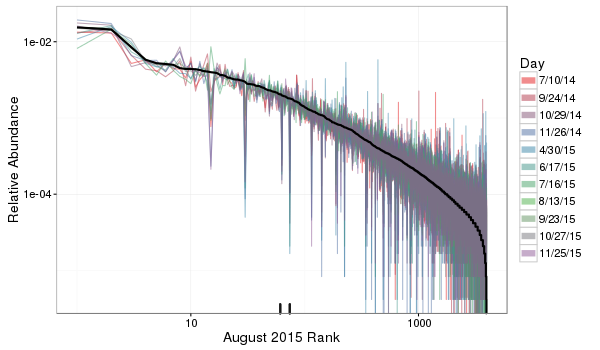

In [48]:
%%R -w 600 -h 350

getPalette = colorRampPalette(brewer.pal(5, "Set1"))

mdf.byday.ranked$Sample_Date = factor(mdf.byday.ranked$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

p = ggplot(mdf.byday.ranked, aes(x = Rank, y = mean_day_abundance, color= factor(Sample_Date))) 

#p = p + geom_vline(data = d.RNA, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.DNA, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = p + geom_line(alpha = 0.5, size = 0.5) 

p = p + geom_rug(data = d, sides = "b", size = 1, alpha = 0.2, color = 'black')

p = p + geom_line(data = subset(mdf.byday.ranked, Sample_Date == '8/13/15'), size = 1, color = 'black')

p = p + scale_color_manual(values=getPalette(15))

p = p + scale_y_log10()

p = p + scale_x_log10()

p = p + theme_bw() + theme(text = element_text(size=14))

p = p + labs(x = "August 2015 Rank", y = "Relative Abundance", color = "Day")  +
       guides(colour = guide_legend(override.aes = list(size=3)))


p